### Importing the Datasets as we need to categorize it

In [358]:
import numpy as np, pandas as pd, re, os

#### Accessing the Information of the matches.

In [359]:
input_directory = 'DatsSet'  
output_directory = 'Info'  
os.makedirs(output_directory, exist_ok=True)  

for filename in os.listdir(input_directory):
    if filename.endswith('_info.csv'):
        file_path = os.path.join(input_directory, filename)
        
        df = pd.read_csv(file_path, on_bad_lines="skip")  
        df = df.T  
        df.columns = df.iloc[0]  
        df = df[1:].reset_index(drop=True)  
        
        match_id = re.search(r'\d+', filename)
        match_id = match_id.group() if match_id else None
        
        df.insert(0, 'Match_id', match_id)  
        
        output_file_path = os.path.join(output_directory, f'{match_id}.csv')  
        df.to_csv(output_file_path, index=False)  

In [360]:
for file in os.listdir("DatsSet"):
    if file.endswith("_info.csv"):
        os.remove(os.path.join("DatsSet", file))

In [361]:
directory = 'Info/'  
dataframes = []  
for filename in os.listdir(directory):  
    if filename.endswith('.csv'):

        file_path = os.path.join(directory, filename)  
        df_temp = pd.read_csv(file_path)  
        
        dataframes.append(df_temp)  

match_df = pd.concat(dataframes, ignore_index=True)
match_df.to_csv('Match_Details.csv', index = False)

In [362]:
for filename in os.listdir(directory):  
    file_path = os.path.join(directory, filename)  
    if os.path.isfile(file_path):  
        os.remove(file_path)

os.rmdir('Info/')  

#### Accesing the Matches Dataset

In [363]:
directory = 'DatsSet/'  
dataframes = []  
for filename in os.listdir(directory):  
    if filename.endswith('.csv'):

        file_path = os.path.join(directory, filename)  
        df_temp = pd.read_csv(file_path)  
        
        dataframes.append(df_temp)  

df = pd.concat(dataframes, ignore_index=True)
df.to_csv('Batters_Details.csv', index = False)

In [364]:
for filename in os.listdir(directory):  
    file_path = os.path.join(directory, filename)  
    if os.path.isfile(file_path):  
        os.remove(file_path)

os.rmdir('DatsSet/')  

    As there were 250+ Files of Per Match Info and Match Informationso we need to clean it as per our need
    So i take an approach to Clean and Merge the DataSet such that i got the actial Results.
    Now we have two files :
        1. Match_Details.csv     - which tells about the Information of Tournament
        2. Batters_Details.csv   - which tells about per match record.

### Importing required Libraries and DataSet.

In [365]:
# !pip install missingno

In [73]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import warnings, plotly.express as px  
import missingno as msno
warnings.filterwarnings('ignore')

In [4]:
match_df = pd.read_csv('Match_Details.csv')
# match_df.columns

In [5]:
bat_df = pd.read_csv('Batters_Details.csv')
# bat_df.columns

In [6]:
match_df.head()

Match_id  balls_per_over         team        team.1 gender season  \
0   1144483               6      England  South Africa   male   2019   
1   1144484               6     Pakistan   West Indies   male   2019   
2   1144485               6  New Zealand     Sri Lanka   male   2019   
3   1144487               6   Bangladesh  South Africa   male   2019   
4   1144488               6      England      Pakistan   male   2019   

         date      event  match_number            venue  ...  \
0  2019/05/30  World Cup           1.0  Kennington Oval  ...   
1  2019/05/31  World Cup           2.0     Trent Bridge  ...   
2  2019/06/01  World Cup           3.0   Sophia Gardens  ...   
3  2019/06/02  World Cup           5.0  Kennington Oval  ...   
4  2019/06/03  World Cup           6.0     Trent Bridge  ...   

           tv_umpire match_referee       winner winner_runs winner_wickets  \
0         PR Reiffel       DC Boon      England       104.0            NaN   
1             S Ravi      JJ Crowe  West Indies         NaN            7.0   
2           NJ Llong    AJ Pycroft  New Zealand         NaN           10.0   
3    HDPK Dharmasena       DC Boon   Bangladesh        21.0            NaN   
4  RSA Palliyaguruge      JJ Crowe     Pakistan        14.0            NaN   

  outcome method date.1 eliminator player_of_match.1  
0     NaN    NaN    NaN        NaN               NaN  
1     NaN    NaN    NaN        NaN               NaN  
2     NaN    NaN    NaN        NaN               NaN  
3     NaN    NaN    NaN        NaN               NaN  
4     NaN    NaN    NaN        NaN               NaN  

[5 rows x 27 columns]

In [7]:
bat_df.head()

match_id season  start_date            venue  innings  ball batting_team  \
0   1144483   2019  2019-05-30  Kennington Oval        1   0.1      England   
1   1144483   2019  2019-05-30  Kennington Oval        1   0.2      England   
2   1144483   2019  2019-05-30  Kennington Oval        1   0.3      England   
3   1144483   2019  2019-05-30  Kennington Oval        1   0.4      England   
4   1144483   2019  2019-05-30  Kennington Oval        1   0.5      England   

   bowling_team      striker  non_striker  ... extras  wides  noballs  byes  \
0  South Africa       JJ Roy  JM Bairstow  ...      0    NaN      NaN   NaN   
1  South Africa  JM Bairstow       JJ Roy  ...      0    NaN      NaN   NaN   
2  South Africa      JE Root       JJ Roy  ...      0    NaN      NaN   NaN   
3  South Africa      JE Root       JJ Roy  ...      0    NaN      NaN   NaN   
4  South Africa      JE Root       JJ Roy  ...      0    NaN      NaN   NaN   

   legbyes  penalty  wicket_type  player_dismissed other_wicket_type  \
0      NaN      NaN          NaN               NaN               NaN   
1      NaN      NaN       caught       JM Bairstow               NaN   
2      NaN      NaN          NaN               NaN               NaN   
3      NaN      NaN          NaN               NaN               NaN   
4      NaN      NaN          NaN               NaN               NaN   

  other_player_dismissed  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 22 columns]

In [8]:
print(f"The Rows Train dataset contains : {bat_df.shape[0]}\nThe Columns dataset contains : {bat_df.shape[1]}")
print("-"*50)
print(f"The Rows Test dataset contains : {match_df.shape[0]}\nThe Columns dataset contains : {match_df.shape[1]}")

The Rows Train dataset contains : 141258
The Columns dataset contains : 22
--------------------------------------------------
The Rows Test dataset contains : 265
The Columns dataset contains : 27


In [9]:
print(bat_df.columns)
print("-"*50)
print(match_df.columns)
print("-"*50)

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')
--------------------------------------------------
Index(['Match_id', 'balls_per_over', 'team', 'team.1', 'gender', 'season',
       'date', 'event', 'match_number', 'venue', 'city', 'toss_winner',
       'toss_decision', 'player_of_match', 'umpire', 'umpire.1',
       'reserve_umpire', 'tv_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'outcome', 'method', 'date.1', 'eliminator',
       'player_of_match.1'],
      dtype='object')
--------------------------------------------------


In [10]:
bat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141258 entries, 0 to 141257
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                141258 non-null  int64  
 1   season                  141258 non-null  object 
 2   start_date              141258 non-null  object 
 3   venue                   141258 non-null  object 
 4   innings                 141258 non-null  int64  
 5   ball                    141258 non-null  float64
 6   batting_team            141258 non-null  object 
 7   bowling_team            141258 non-null  object 
 8   striker                 141258 non-null  object 
 9   non_striker             141258 non-null  object 
 10  bowler                  141258 non-null  object 
 11  runs_off_bat            141258 non-null  int64  
 12  extras                  141258 non-null  int64  
 13  wides                   3441 non-null    float64
 14  noballs             

In [11]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Match_id           265 non-null    int64  
 1   balls_per_over     265 non-null    int64  
 2   team               265 non-null    object 
 3   team.1             265 non-null    object 
 4   gender             265 non-null    object 
 5   season             265 non-null    object 
 6   date               265 non-null    object 
 7   event              265 non-null    object 
 8   match_number       230 non-null    float64
 9   venue              265 non-null    object 
 10  city               249 non-null    object 
 11  toss_winner        265 non-null    object 
 12  toss_decision      265 non-null    object 
 13  player_of_match    261 non-null    object 
 14  umpire             265 non-null    object 
 15  umpire.1           265 non-null    object 
 16  reserve_umpire     215 non

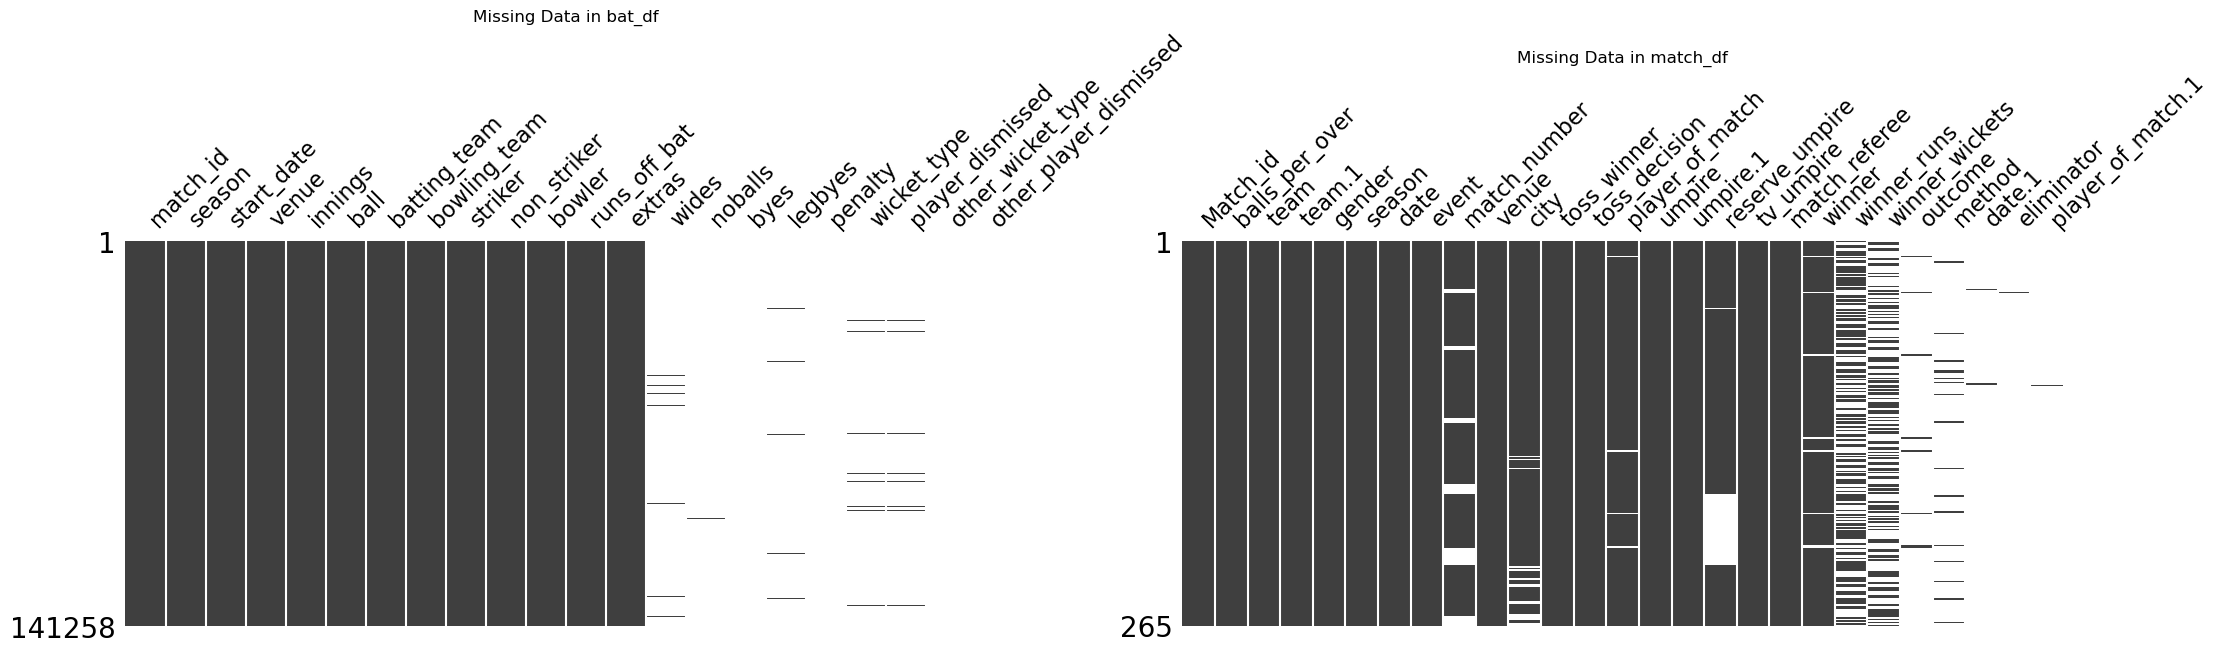

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(25, 5))

msno.matrix(bat_df, ax = axes[0])
axes[0].set_title("Missing Data in bat_df")
msno.matrix(match_df, ax = axes[1])
axes[1].set_title("Missing Data in match_df")

plt.show()

In [13]:
def generate_null_analysis(df):
    count = df.isnull().sum()
    percen = count / len(df) * 100
    
    df_null = pd.DataFrame({
        'column name': df.columns,
        'total count': count,
        'percentage': percen
    })
    
    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by = 'percentage', ascending = False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    df_filtered.reset_index(drop = True, inplace = True)
    
    return df_filtered

df_filtered_del = generate_null_analysis(bat_df)
df_filtered_match = generate_null_analysis(match_df)

def style_null_analysis(df):
    return df.style.background_gradient(cmap = 'YlOrRd', subset = ['percentage', 'total count'])

bat_df_styled = style_null_analysis(df_filtered_del)
match_df_styled = style_null_analysis(df_filtered_match)

In [14]:
from IPython.display import HTML, display  

display(HTML(  
    "<div style='display: flex; align-items: center; margin-left : 60px;'>" 
    f"<div style='flex: 1; padding: 10px;'>{bat_df_styled.to_html()}</div>"  
    f"<div style='flex: 1; padding: 10px;'>{match_df_styled.to_html()}</div>"  
    "</div>"  
))  

In [15]:
bat_df.describe()

match_id        innings           ball   runs_off_bat  \
count  1.412580e+05  141258.000000  141258.000000  141258.000000   
mean   6.114612e+05       1.452647      22.600599       0.809604   
std    4.626635e+05       0.498138      13.860209       1.292710   
min    6.523500e+04       1.000000       0.100000       0.000000   
25%    2.474760e+05       1.000000      10.500000       0.000000   
50%    4.335940e+05       1.000000      21.700000       0.000000   
75%    1.144499e+06       2.000000      34.200000       1.000000   
max    1.384439e+06       4.000000      49.900000       6.000000   

              extras        wides     noballs        byes      legbyes  \
count  141258.000000  3441.000000  671.000000  239.000000  1429.000000   
mean        0.052096     1.221738    1.049180    2.142259     1.349895   
std         0.306611     0.842859    0.352765    1.352190     0.867662   
min         0.000000     1.000000    1.000000    1.000000     1.000000   
25%         0.000000     1.000000    1.000000    1.000000     1.000000   
50%         0.000000     1.000000    1.000000    1.000000     1.000000   
75%         0.000000     1.000000    1.000000    4.000000     1.000000   
max         5.000000     5.000000    5.000000    4.000000     5.000000   

       penalty  
count      2.0  
mean       5.0  
std        0.0  
min        5.0  
25%        5.0  
50%        5.0  
75%        5.0  
max        5.0

In [16]:
match_df.describe()

Match_id  balls_per_over  match_number  winner_runs  winner_wickets
count  2.650000e+02           265.0    230.000000   144.000000      113.000000
mean   6.021991e+05             6.0     22.826087    99.659722        6.265487
std    4.621467e+05             0.0     12.911023    68.757318        2.271790
min    6.523500e+04             6.0      1.000000     2.000000        1.000000
25%    2.474750e+05             6.0     12.000000    48.750000        5.000000
50%    4.335910e+05             6.0     23.000000    90.000000        7.000000
75%    1.144494e+06             6.0     34.000000   131.750000        8.000000
max    1.384439e+06             6.0     48.000000   309.000000       10.000000

#### Woking upon the Match Details DataSet

In [17]:
match_df['balls_per_over'].unique()

array([6], dtype=int64)

In [18]:
print(match_df['team'].unique())
print(40*'-')
print(match_df['team.1'].unique())
print(40*'-')
print(match_df['gender'].unique())
print(40*'-')
print(match_df['season'].unique())
print(40*'-')
print(match_df['event'].unique())
print(40*'-')

['England' 'Pakistan' 'New Zealand' 'Bangladesh' 'India' 'Australia'
 'South Africa' 'Sri Lanka' 'Netherlands' 'West Indies' 'Bermuda'
 'Ireland' 'Canada' 'Scotland' 'Kenya' 'Zimbabwe' 'United Arab Emirates']
----------------------------------------
['South Africa' 'West Indies' 'Sri Lanka' 'Pakistan' 'New Zealand'
 'Bangladesh' 'India' 'Australia' 'England' 'Netherlands' 'Scotland'
 'Zimbabwe' 'Ireland' 'Kenya' 'Bermuda' 'Canada' 'Namibia'
 'United Arab Emirates']
----------------------------------------
['male']
----------------------------------------
['2019' '2023/24' '2006/07' '2010/11' '2002/03' '2014/15']
----------------------------------------
['World Cup' 'ICC Cricket World Cup' 'ICC World Cup']
----------------------------------------


    Have to drop the Useless Columns Such that we have a proper Data

In [19]:
removal = ['balls_per_over', 'gender',  'event', 'match_number', 'winner_runs', 'reserve_umpire', 'match_referee', 
       'winner_wickets', 'outcome', 'method', 'date.1', 'eliminator', 'player_of_match.1']
match_df.drop(removal, axis = 1, inplace = True)

In [20]:
match_df.rename(columns = {'team': 'team_A', 'team.1': 'team_B', 'umpire': 'umpire_A', 'umpire.1': 'umpire_B'}, inplace = True)

In [21]:
match_df.head()

Match_id       team_A        team_B season        date            venue  \
0   1144483      England  South Africa   2019  2019/05/30  Kennington Oval   
1   1144484     Pakistan   West Indies   2019  2019/05/31     Trent Bridge   
2   1144485  New Zealand     Sri Lanka   2019  2019/06/01   Sophia Gardens   
3   1144487   Bangladesh  South Africa   2019  2019/06/02  Kennington Oval   
4   1144488      England      Pakistan   2019  2019/06/03     Trent Bridge   

         city   toss_winner toss_decision  player_of_match      umpire_A  \
0      London  South Africa         field        BA Stokes  BNJ Oxenford   
1  Nottingham   West Indies         field         O Thomas   CB Gaffaney   
2     Cardiff   New Zealand         field         MJ Henry     RJ Tucker   
3      London  South Africa         field  Shakib Al Hasan     JS Wilson   
4  Nottingham       England         field  Mohammad Hafeez     M Erasmus   

          umpire_B          tv_umpire       winner  
0  HDPK Dharmasena         PR Reiffel      England  
1        M Erasmus             S Ravi  West Indies  
2         IJ Gould           NJ Llong  New Zealand  
3       PR Reiffel    HDPK Dharmasena   Bangladesh  
4           S Ravi  RSA Palliyaguruge     Pakistan

In [22]:
match_df.isnull().sum()[match_df.isnull().sum() > 0]

city               16
player_of_match     4
winner              8
dtype: int64

In [23]:
# match_df[match_df['city'].isnull()]
match_df[match_df['venue'] == 'Sydney Cricket Ground']

Match_id        team_A       team_B   season        date  \
237    656435  South Africa  West Indies  2014/15  2015/02/27   
248    656461     Australia    Sri Lanka  2014/15  2015/03/08   
258    656483  South Africa    Sri Lanka  2014/15  2015/03/18   
263    656493     Australia        India  2014/15  2015/03/26   

                     venue city   toss_winner toss_decision player_of_match  \
237  Sydney Cricket Ground  NaN  South Africa           bat  AB de Villiers   
248  Sydney Cricket Ground  NaN     Australia           bat      GJ Maxwell   
258  Sydney Cricket Ground  NaN     Sri Lanka           bat     Imran Tahir   
263  Sydney Cricket Ground  NaN     Australia           bat       SPD Smith   

            umpire_A          umpire_B         tv_umpire        winner  
237         SJ Davis          IJ Gould     REJ Martinesz  South Africa  
248        Aleem Dar          IJ Gould    RK Illingworth     Australia  
258         NJ Llong         RJ Tucker  RA Kettleborough  South Africa  
263  HDPK Dharmasena  RA Kettleborough         M Erasmus     Australia

In [24]:
match_df.loc[match_df['city'].isnull(), 'venue'].unique().tolist()

['Pallekele International Cricket Stadium',
 'Melbourne Cricket Ground',
 'Adelaide Oval',
 'Sydney Cricket Ground']

In [25]:
match_df.loc[match_df['city'].isnull(), 'city'] = match_df['venue'].str.split().str[0]

In [26]:
match_df[match_df['player_of_match'].isnull()]

Match_id        team_A       team_B   season        date  \
10    1144497  South Africa  West Indies     2019  2019/06/10   
144    433577     Sri Lanka    Australia  2010/11  2011/03/05   
187     65249   West Indies   Bangladesh  2002/03  2003/02/18   
210     65273      Pakistan     Zimbabwe  2002/03  2003/03/04   

                            venue         city  toss_winner toss_decision  \
10                  The Rose Bowl  Southampton  West Indies         field   
144           R Premadasa Stadium      Colombo    Sri Lanka           bat   
187      Willowmoore Park, Benoni       Benoni   Bangladesh         field   
210  Queens Sports Club, Bulawayo     Bulawayo     Pakistan           bat   

    player_of_match      umpire_A   umpire_B    tv_umpire winner  
10              NaN      P Wilson  RJ Tucker       S Ravi    NaN  
144             NaN      IJ Gould    AL Hill  SK Tarapore    NaN  
187             NaN    BG Jerling  RB Tiffin    BF Bowden    NaN  
210             NaN  EAR de Silva  BF Bowden  RE Koertzen    NaN

#### Working on Each Match DataSet

In [27]:
bat_df['season'].unique()

array(['2019', '2023/24', '2006/07', '2010/11', '2002/03', '2014/15'],
      dtype=object)

In [28]:
bat_df['innings'].unique()

array([1, 2, 3, 4], dtype=int64)

In [29]:
bat_df[bat_df['innings'].isin([3, 4])].head() # It basically describes about the Super Over

match_id season  start_date   venue  innings  ball batting_team  \
19920   1144530   2019  2019-07-14  Lord's        3   0.1      England   
19921   1144530   2019  2019-07-14  Lord's        3   0.2      England   
19922   1144530   2019  2019-07-14  Lord's        3   0.3      England   
19923   1144530   2019  2019-07-14  Lord's        3   0.4      England   
19924   1144530   2019  2019-07-14  Lord's        3   0.5      England   

      bowling_team     striker non_striker  ... extras  wides  noballs  byes  \
19920  New Zealand   BA Stokes  JC Buttler  ...      0    NaN      NaN   NaN   
19921  New Zealand  JC Buttler   BA Stokes  ...      0    NaN      NaN   NaN   
19922  New Zealand   BA Stokes  JC Buttler  ...      0    NaN      NaN   NaN   
19923  New Zealand   BA Stokes  JC Buttler  ...      0    NaN      NaN   NaN   
19924  New Zealand  JC Buttler   BA Stokes  ...      0    NaN      NaN   NaN   

       legbyes  penalty  wicket_type  player_dismissed other_wicket_type  \
19920      NaN      NaN          NaN               NaN               NaN   
19921      NaN      NaN          NaN               NaN               NaN   
19922      NaN      NaN          NaN               NaN               NaN   
19923      NaN      NaN          NaN               NaN               NaN   
19924      NaN      NaN          NaN               NaN               NaN   

      other_player_dismissed  
19920                    NaN  
19921                    NaN  
19922                    NaN  
19923                    NaN  
19924                    NaN  

[5 rows x 22 columns]

In [30]:
print('runs_off_bat', bat_df['runs_off_bat'].unique())
print(40*'-')
print('extras', bat_df['extras'].unique())
print(40*'-')
print('wides', bat_df['wides'].unique())
print(40*'-')
print('noballs', bat_df['noballs'].unique())
print(40*'-')
print('byes', bat_df['byes'].unique())
print(40*'-')
print('legbyes', bat_df['legbyes'].unique())
print(40*'-')
print('penalty', bat_df['penalty'].unique())

runs_off_bat [1 0 4 2 6 3 5]
----------------------------------------
extras [0 1 4 5 2 3]
----------------------------------------
wides [nan  1.  5.  2.  3.  4.]
----------------------------------------
noballs [nan  1.  2.  5.  3.]
----------------------------------------
byes [nan  4.  1.  2.  3.]
----------------------------------------
legbyes [nan  1.  4.  2.  3.  5.]
----------------------------------------
penalty [nan  5.]


#### Feature Engineering and EDA

In [31]:
removal = ['season', 'start_date', 'venue', 'wides', 'noballs', 'byes', 'legbyes',
    'penalty', 'other_wicket_type', 'other_player_dismissed']
bat_df.drop(removal, axis = 1, inplace = True)

In [32]:
bat_df['Actual_Runs'] = bat_df['runs_off_bat'] + bat_df['extras']

In [33]:
bat_df.columns

Index(['match_id', 'innings', 'ball', 'batting_team', 'bowling_team',
       'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras',
       'wicket_type', 'player_dismissed', 'Actual_Runs'],
      dtype='object')

In [34]:
bat_df.head()

match_id  innings  ball batting_team  bowling_team      striker  \
0   1144483        1   0.1      England  South Africa       JJ Roy   
1   1144483        1   0.2      England  South Africa  JM Bairstow   
2   1144483        1   0.3      England  South Africa      JE Root   
3   1144483        1   0.4      England  South Africa      JE Root   
4   1144483        1   0.5      England  South Africa      JE Root   

   non_striker       bowler  runs_off_bat  extras wicket_type  \
0  JM Bairstow  Imran Tahir             1       0         NaN   
1       JJ Roy  Imran Tahir             0       0      caught   
2       JJ Roy  Imran Tahir             0       0         NaN   
3       JJ Roy  Imran Tahir             0       0         NaN   
4       JJ Roy  Imran Tahir             0       0         NaN   

  player_dismissed  Actual_Runs  
0              NaN            1  
1      JM Bairstow            0  
2              NaN            0  
3              NaN            0  
4              NaN            0

In [35]:
ttl_runs_Innings_1 = bat_df[bat_df['innings'] == 1].groupby(['match_id', 'batting_team'], as_index=False).agg({'Actual_Runs': 'sum'})
# ttl_runs_Innings_1
ttl_runs_Innings_2 = bat_df[bat_df['innings'] == 2].groupby(['match_id', 'batting_team'], as_index=False).agg({'Actual_Runs': 'sum'})
# ttl_runs_Innings_2

In [36]:
print(ttl_runs_Innings_1.shape)
print(ttl_runs_Innings_2.shape)

(265, 3)
(262, 3)


In [37]:
ttl_runs_Innings_1.rename(columns = {'batting_team' : '1st_Inning', 'Actual_Runs' : '1st_Inning_Run'}, inplace = True)
ttl_runs_Innings_2.rename(columns = {'batting_team' : '2nd_Inning', 'Actual_Runs' : '2nd_Inning_Run'}, inplace = True)

In [38]:
removal = ttl_runs_Innings_1[~ttl_runs_Innings_1['match_id'].isin(ttl_runs_Innings_2['match_id'])]
removal

match_id    1st_Inning  1st_Inning_Run
36      65273      Pakistan              73
118    433577     Sri Lanka             146
200   1144497  South Africa              29

In [39]:
# ttl_runs_Innings_1.drop(removal.index, axis = 0, inplace = True)

In [40]:
print(ttl_runs_Innings_1.shape)
print(ttl_runs_Innings_2.shape)

(265, 3)
(262, 3)


In [41]:
team_classify = merged_df = pd.merge(ttl_runs_Innings_1, ttl_runs_Innings_2, on = 'match_id', how = 'outer')
team_classify.head()

match_id   1st_Inning  1st_Inning_Run    2nd_Inning  2nd_Inning_Run
0     65235  West Indies             278  South Africa           275.0
1     65236     Zimbabwe             340       Namibia           104.0
2     65237    Sri Lanka             272   New Zealand           225.0
3     65238    Australia             310      Pakistan           228.0
4     65239       Canada             180    Bangladesh           120.0

In [42]:
team_classify['winner_team'] = team_classify.apply(lambda row: row['1st_Inning'] if row['1st_Inning_Run'] > row['2nd_Inning_Run'] else
                                    (row['2nd_Inning'] if row['2nd_Inning_Run'] > row['1st_Inning_Run'] else 'Tie'), axis = 1)
team_classify

match_id    1st_Inning  1st_Inning_Run    2nd_Inning  2nd_Inning_Run  \
0       65235   West Indies             278  South Africa           275.0   
1       65236      Zimbabwe             340       Namibia           104.0   
2       65237     Sri Lanka             272   New Zealand           225.0   
3       65238     Australia             310      Pakistan           228.0   
4       65239        Canada             180    Bangladesh           120.0   
..        ...           ...             ...           ...             ...   
260   1384435       England             337      Pakistan           244.0   
261   1384436         India             410   Netherlands           250.0   
262   1384437         India             397   New Zealand           327.0   
263   1384438  South Africa             212     Australia           215.0   
264   1384439         India             240     Australia           241.0   

     winner_team  
0    West Indies  
1       Zimbabwe  
2      Sri Lanka  
3      Australia  
4         Canada  
..           ...  
260      England  
261        India  
262        India  
263    Australia  
264    Australia  

[265 rows x 6 columns]

In [43]:
def create_wicket_columns(group):  
    group['wicket_no'] = (group['player_dismissed'].notna()).cumsum()
    group['wicket_no'] = group['wicket_no'].where(group['player_dismissed'].notna(), 0)
    group['bowler_wickets'] = group['player_dismissed'].notna().astype(int)
    return group  

bat_df = bat_df.groupby(['match_id', 'innings'], group_keys=False).apply(create_wicket_columns)  


In [44]:
highest_over = bat_df.groupby(['match_id', 'batting_team'])['ball'].max().reset_index()

In [45]:
merged_df = highest_over.merge(team_classify, on='match_id', how='left')

merged_df['1st_Inning_Over'] = merged_df['ball'].where(merged_df['batting_team'] == merged_df['1st_Inning'])
merged_df['2nd_Inning_Over'] = merged_df['ball'].where(merged_df['batting_team'] == merged_df['2nd_Inning'])

final_df = merged_df.groupby(['match_id', '1st_Inning', '1st_Inning_Run', '2nd_Inning', '2nd_Inning_Run', 'winner_team'], as_index=False).agg({
    '1st_Inning_Over': 'max',
    '2nd_Inning_Over': 'max'
})[["match_id", "1st_Inning", "1st_Inning_Run", "1st_Inning_Over", "2nd_Inning", "2nd_Inning_Run", "2nd_Inning_Over", "winner_team"]]

In [46]:
final_df.head()

match_id   1st_Inning  1st_Inning_Run  1st_Inning_Over    2nd_Inning  \
0     65235  West Indies             278             49.6  South Africa   
1     65236     Zimbabwe             340             49.6       Namibia   
2     65237    Sri Lanka             272             49.7   New Zealand   
3     65238    Australia             310             49.7      Pakistan   
4     65239       Canada             180             49.1    Bangladesh   

   2nd_Inning_Run  2nd_Inning_Over  winner_team  
0           275.0             48.6  West Indies  
1           104.0             25.1     Zimbabwe  
2           225.0             45.3    Sri Lanka  
3           228.0             44.3    Australia  
4           120.0             27.6       Canada

In [47]:
highest_wickets = bat_df.groupby(['match_id', 'batting_team'])['wicket_no'].max().reset_index()
highest_wickets.rename(columns={'wicket_no': 'wickets_lost'}, inplace=True)

In [48]:
highest_wickets[highest_wickets['wickets_lost'] == 11]

Empty DataFrame
Columns: [match_id, batting_team, wickets_lost]
Index: []

In [49]:
highest_wickets['wickets_lost'].unique()

array([ 9,  5,  2, 10,  7,  8,  0,  1,  6,  4,  3])

In [50]:
# bat_df.to_csv('b.csv')

In [51]:
final_df[final_df['match_id'] == 1144530]

match_id   1st_Inning  1st_Inning_Run  1st_Inning_Over 2nd_Inning  \
222   1144530  New Zealand             241             49.7    England   

     2nd_Inning_Run  2nd_Inning_Over winner_team  
222           241.0             49.6         Tie

In [52]:
final_df = final_df.merge(
    highest_wickets, left_on=['match_id', '1st_Inning'], right_on=['match_id', 'batting_team'], how='left'
).rename(columns={'wickets_lost': 'Wickets_in_1st_Inning'}).drop(columns=['batting_team'])

final_df = final_df.merge(
    highest_wickets, left_on=['match_id', '2nd_Inning'], right_on=['match_id', 'batting_team'], how='left'
).rename(columns={'wickets_lost': 'Wickets_in_2nd_Inning'}).drop(columns=['batting_team'])

final_df = final_df[['match_id', '1st_Inning', '1st_Inning_Run', '1st_Inning_Over', 'Wickets_in_1st_Inning', 
                     '2nd_Inning', '2nd_Inning_Run', '2nd_Inning_Over', 'Wickets_in_2nd_Inning', 'winner_team']]

In [53]:
final_df['Total_runs'] = final_df['1st_Inning_Run'] + final_df['2nd_Inning_Run']

In [54]:
bat_df.insert(2, 'over', bat_df['ball'].astype(int))

In [55]:
display(final_df[final_df['match_id'] == 1144483].head(1))
display(match_df[match_df['Match_id'] == 1144483].head())
display(bat_df[bat_df['match_id'] == 1144483].head(1))

match_id 1st_Inning  1st_Inning_Run  1st_Inning_Over  \
188   1144483    England             311             49.6   

     Wickets_in_1st_Inning    2nd_Inning  2nd_Inning_Run  2nd_Inning_Over  \
188                      8  South Africa           207.0             39.5   

     Wickets_in_2nd_Inning winner_team  Total_runs  
188                     10     England       518.0

Match_id   team_A        team_B season        date            venue  \
0   1144483  England  South Africa   2019  2019/05/30  Kennington Oval   

     city   toss_winner toss_decision player_of_match      umpire_A  \
0  London  South Africa         field       BA Stokes  BNJ Oxenford   

          umpire_B   tv_umpire   winner  
0  HDPK Dharmasena  PR Reiffel  England

match_id  innings  over  ball batting_team  bowling_team striker  \
0   1144483        1     0   0.1      England  South Africa  JJ Roy   

   non_striker       bowler  runs_off_bat  extras wicket_type  \
0  JM Bairstow  Imran Tahir             1       0         NaN   

  player_dismissed  Actual_Runs  wicket_no  bowler_wickets  
0              NaN            1          0               0

In [56]:
def win_details(row):
    if row['winner_team'] == "Tie":
        return "Match tied", "Tie"
    
    if row['winner_team'] == row['1st_Inning']:
        return f"Won by {row['1st_Inning_Run'] - row['2nd_Inning_Run']} runs", "Runs"
    
    win_margin = 10 - row['Wickets_in_2nd_Inning']
    balls_remaining = (50 * 6) - (row['2nd_Inning_Over'] * 6)
    
    return (f"Won by {win_margin} wickets with {int(balls_remaining)} balls remaining" if balls_remaining > 0 
            else f"Won by {win_margin} wickets", "Wickets")

final_df[['win_category', 'win_type']] = final_df.apply(lambda row: pd.Series(win_details(row)), axis=1)

In [57]:
final_df['win_category'].unique()[0 : 10]

array(['Won by 3.0 runs', 'Won by 236.0 runs', 'Won by 47.0 runs',
       'Won by 82.0 runs', 'Won by 60.0 runs',
       'Won by 10 wickets with 172 balls remaining', 'Won by 68.0 runs',
       'Won by 20.0 runs', 'Won by 9 wickets with 166 balls remaining',
       'Won by 4 wickets with 10 balls remaining'], dtype=object)

In [58]:
final_df['win_type'].unique()

array(['Runs', 'Wickets', 'Tie'], dtype=object)

In [59]:
final_df[final_df['win_type'] == 'Tie']

match_id   1st_Inning  1st_Inning_Run  1st_Inning_Over  \
51     247461      Ireland             221             49.6   
108    433568        India             338             49.6   
222   1144530  New Zealand             241             49.7   

     Wickets_in_1st_Inning 2nd_Inning  2nd_Inning_Run  2nd_Inning_Over  \
51                       9   Zimbabwe           221.0             49.6   
108                     10    England           338.0             49.6   
222                      8    England           241.0             49.6   

     Wickets_in_2nd_Inning winner_team  Total_runs win_category win_type  
51                      10         Tie       442.0   Match tied      Tie  
108                      8         Tie       676.0   Match tied      Tie  
222                     10         Tie       482.0   Match tied      Tie

In [60]:
bat_df['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'stumped',
       'caught and bowled', 'hit wicket', 'retired hurt'], dtype=object)

In [61]:
final_df['Total Runs'] = final_df['1st_Inning_Run'] + final_df['2nd_Inning_Run']
ttl = final_df[['match_id', 'Total Runs']]

In [62]:
match_df = pd.merge(match_df, ttl, left_on = 'Match_id', right_on = 'match_id')  
match_df.head()

Match_id       team_A        team_B season        date            venue  \
0   1144483      England  South Africa   2019  2019/05/30  Kennington Oval   
1   1144484     Pakistan   West Indies   2019  2019/05/31     Trent Bridge   
2   1144485  New Zealand     Sri Lanka   2019  2019/06/01   Sophia Gardens   
3   1144487   Bangladesh  South Africa   2019  2019/06/02  Kennington Oval   
4   1144488      England      Pakistan   2019  2019/06/03     Trent Bridge   

         city   toss_winner toss_decision  player_of_match      umpire_A  \
0      London  South Africa         field        BA Stokes  BNJ Oxenford   
1  Nottingham   West Indies         field         O Thomas   CB Gaffaney   
2     Cardiff   New Zealand         field         MJ Henry     RJ Tucker   
3      London  South Africa         field  Shakib Al Hasan     JS Wilson   
4  Nottingham       England         field  Mohammad Hafeez     M Erasmus   

          umpire_B          tv_umpire       winner  match_id  Total Runs  
0  HDPK Dharmasena         PR Reiffel      England   1144483       518.0  
1        M Erasmus             S Ravi  West Indies   1144484       213.0  
2         IJ Gould           NJ Llong  New Zealand   1144485       273.0  
3       PR Reiffel    HDPK Dharmasena   Bangladesh   1144487       639.0  
4           S Ravi  RSA Palliyaguruge     Pakistan   1144488       682.0

##### Now we have Some DataSets to Explore about the Data

    Why These DataSets
    1. Match_df - The DataSet contains about the match detail as the Tournament between teams and what are the end results
                  they got the actual result per match.
                  Can save by using --->  pd.to_csv()
    2. Final_df - This data only describes the weightage of the teams performance and more about the strategic measures
    3. Bat_df - This id the Main Dataset which describes the per match per over per ball record which help to figure out
                the performance Ratio and the Strategic plans for each team as per over ratio.

In [63]:
print(f"The Rows Match_df contains : {match_df.shape[0]}\nThe Columns Match_df contains : {match_df.shape[1]}")
print("-"*50)
print(f"The Rows bat_df contains : {bat_df.shape[0]}\nThe Columns bat_df contains : {bat_df.shape[1]}")
print("-"*50)
print(f"The Rows final_df contains : {final_df.shape[0]}\nThe Columns final_df contains : {final_df.shape[1]}")

The Rows Match_df contains : 262
The Columns Match_df contains : 16
--------------------------------------------------
The Rows bat_df contains : 141258
The Columns bat_df contains : 16
--------------------------------------------------
The Rows final_df contains : 262
The Columns final_df contains : 14


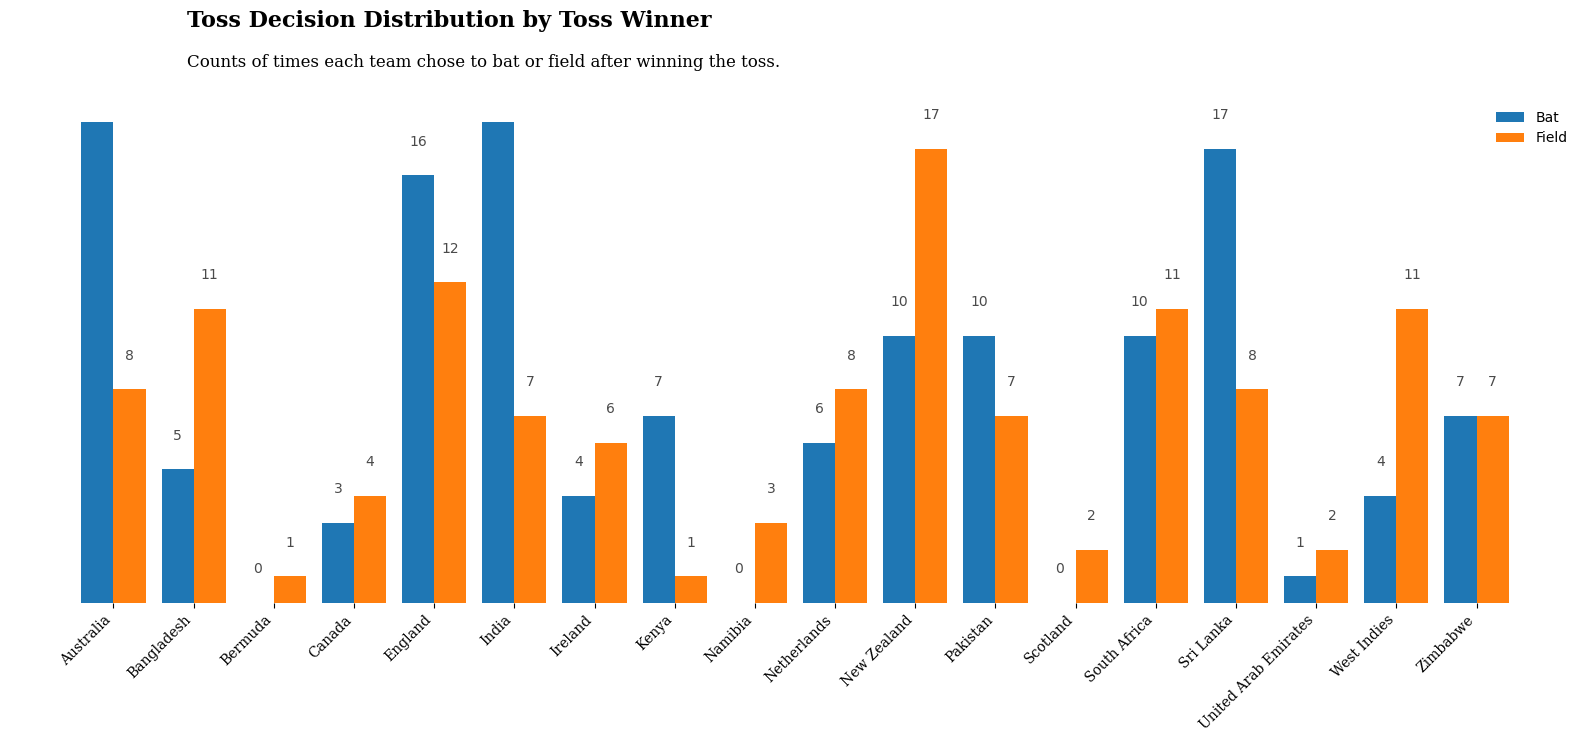

In [64]:
mf = match_df.groupby('toss_winner')['toss_decision'].value_counts().unstack().fillna(0).astype(int)  
mf = mf.sort_index()  

# Set up the plot  
fig, ax = plt.subplots(figsize=(16, 8))  
width = 0.4  
x = range(len(mf.index))  

ax.bar([i - width/2 for i in x], mf['bat'], width=width, label='Bat', color='#1f77b4')  
ax.bar([i + width/2 for i in x], mf['field'], width=width, label='Field', color='#ff7f0e')  

for i, (bat, field) in enumerate(zip(mf['bat'], mf['field'])):  
    ax.annotate(f"{bat}", xy=(x[i] - width/2, bat + 1), va='bottom', ha='center', color='#4a4a4a')  
    ax.annotate(f"{field}", xy=(x[i] + width/2, field + 1), va='bottom', ha='center', color='#4a4a4a')  

ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)  
ax.set_xticks(x)  
ax.set_xticklabels(mf.index, rotation=45, ha='right', fontfamily='serif')  
ax.set_yticks([])  

plt.legend(loc='upper right', frameon=False)

fig.text(0.12, 0.95, 'Toss Decision Distribution by Toss Winner', fontsize=16, fontweight='bold', fontfamily='serif')  
fig.text(0.12, 0.90, 'Counts of times each team chose to bat or field after winning the toss.', fontsize=12, fontfamily='serif')  

plt.tight_layout(rect=[0, 0.05, 1, 0.88])  
plt.show()  

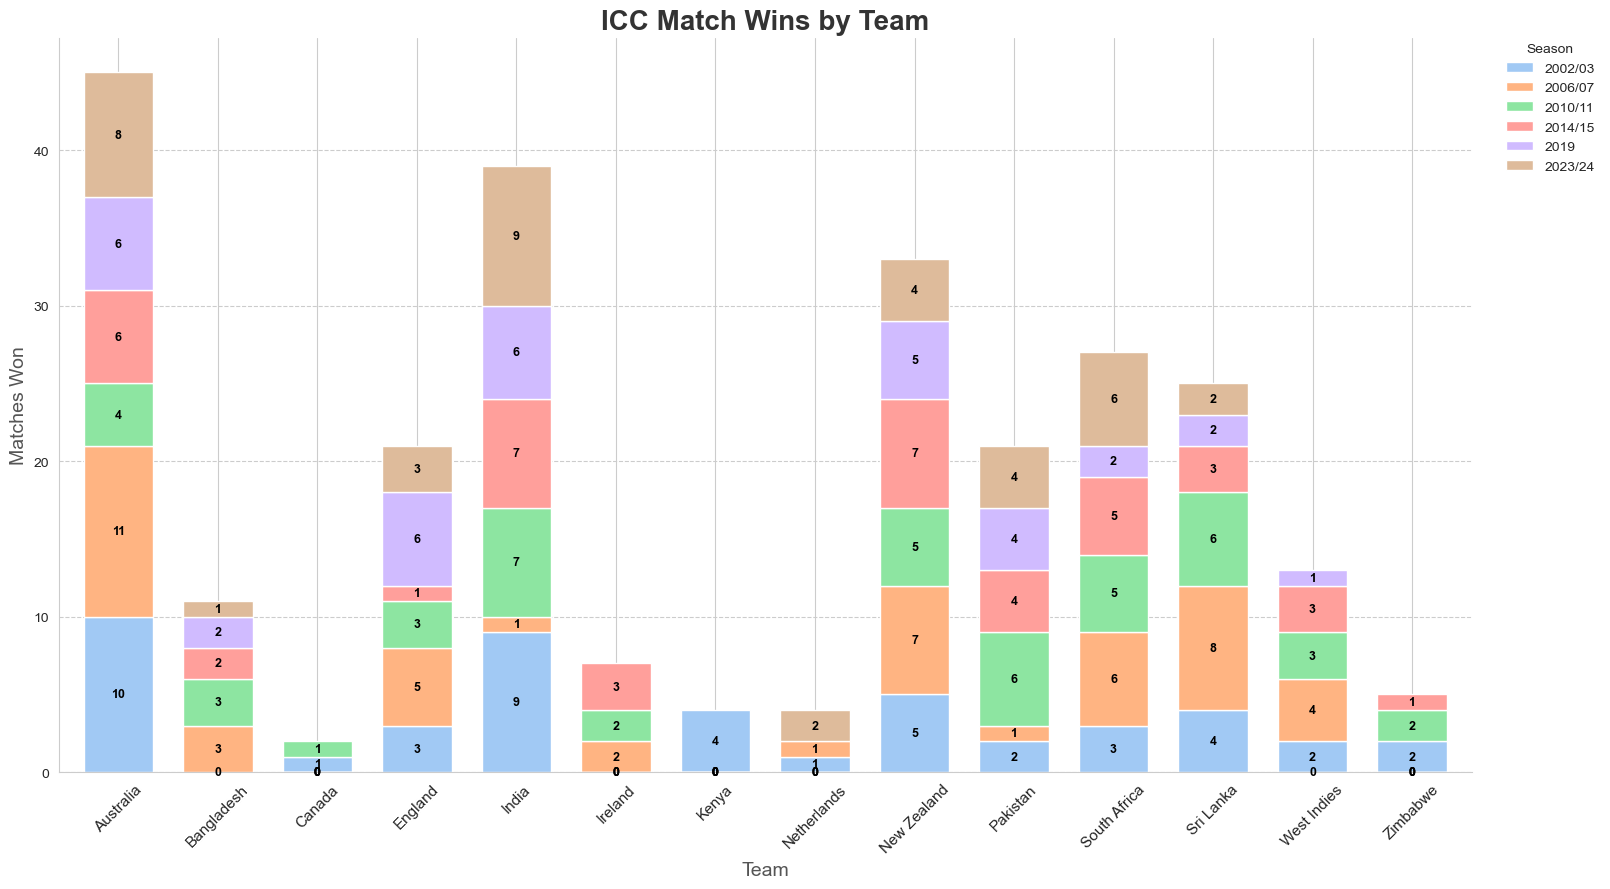

In [65]:
season_winners = match_df.groupby(['season', 'winner']).size().unstack(fill_value=0)

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18, 9))

colors = sns.color_palette("pastel", n_colors=len(season_winners.index))

season_winners.T.plot(kind='bar', stacked=True, color=colors, ax=ax, width=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=9, color='black', fontweight='bold')

ax.set_title("ICC Match Wins by Team", fontsize=20, fontweight='bold', color="#333333")
ax.set_xlabel("Team", fontsize=14, color="#555555")
ax.set_ylabel("Matches Won", fontsize=14, color="#555555")
ax.tick_params(axis='x', rotation=45, labelsize=11)
ax.legend(title="Season", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False, fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


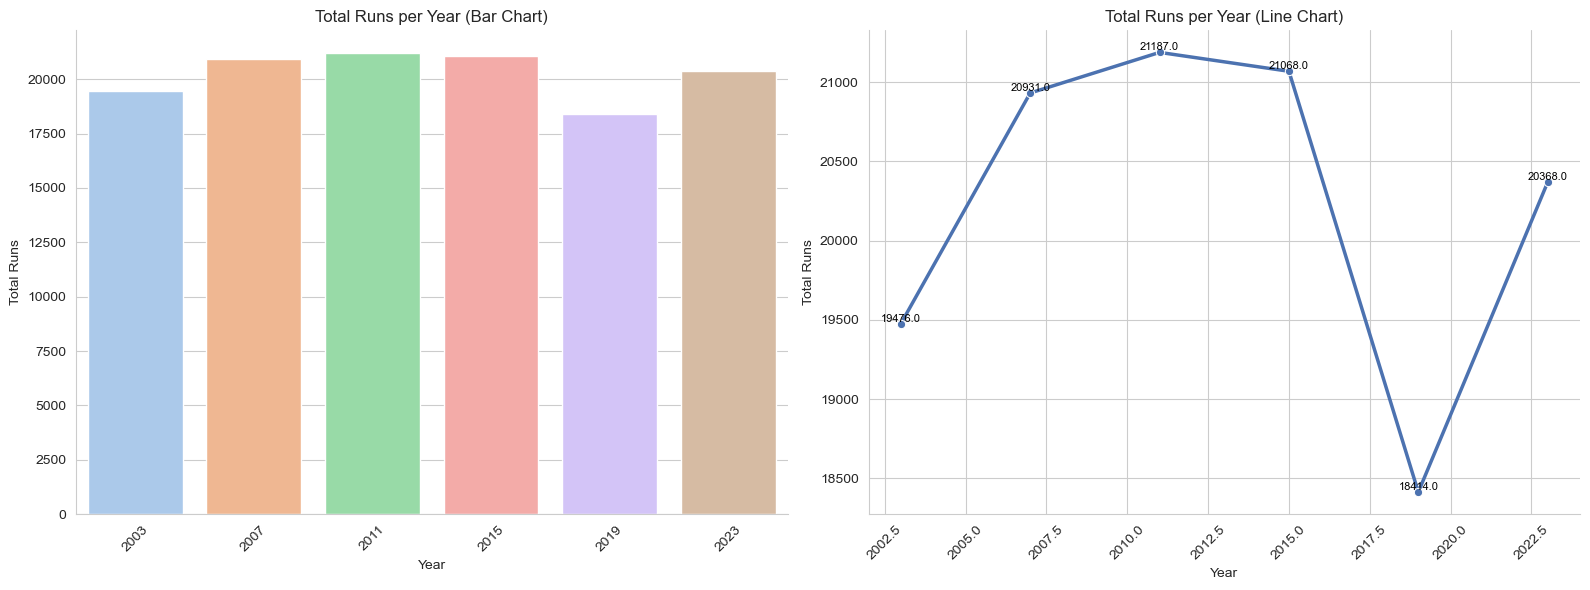

In [66]:
match_df['date'] = pd.to_datetime(match_df['date'])
match_df['year'] = match_df['date'].dt.year
runs_per_year = match_df.groupby('year')['Total Runs'].sum()

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

pastel_colors = sns.color_palette("pastel")
sns.barplot(x=runs_per_year.index, y=runs_per_year.values, palette=pastel_colors, ax=axes[0])
axes[0].set(xlabel="Year", ylabel="Total Runs", title="Total Runs per Year (Bar Chart)")
axes[0].tick_params(axis='x', rotation=45)
sns.despine(ax=axes[0])
axes[0].set_facecolor('white')

for x, y in zip(runs_per_year.index, runs_per_year.values):
    axes[1].text(x, y, f'{y}', ha='center', va='bottom', fontsize=8, color='black')

sns.lineplot(x=runs_per_year.index, y=runs_per_year.values, marker='o', color="#4c72b0", linewidth=2.5, ax=axes[1])
axes[1].set(xlabel="Year", ylabel="Total Runs", title="Total Runs per Year (Line Chart)")
axes[1].tick_params(axis='x', rotation=45)
sns.despine(ax=axes[1])
axes[1].set_facecolor('white')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

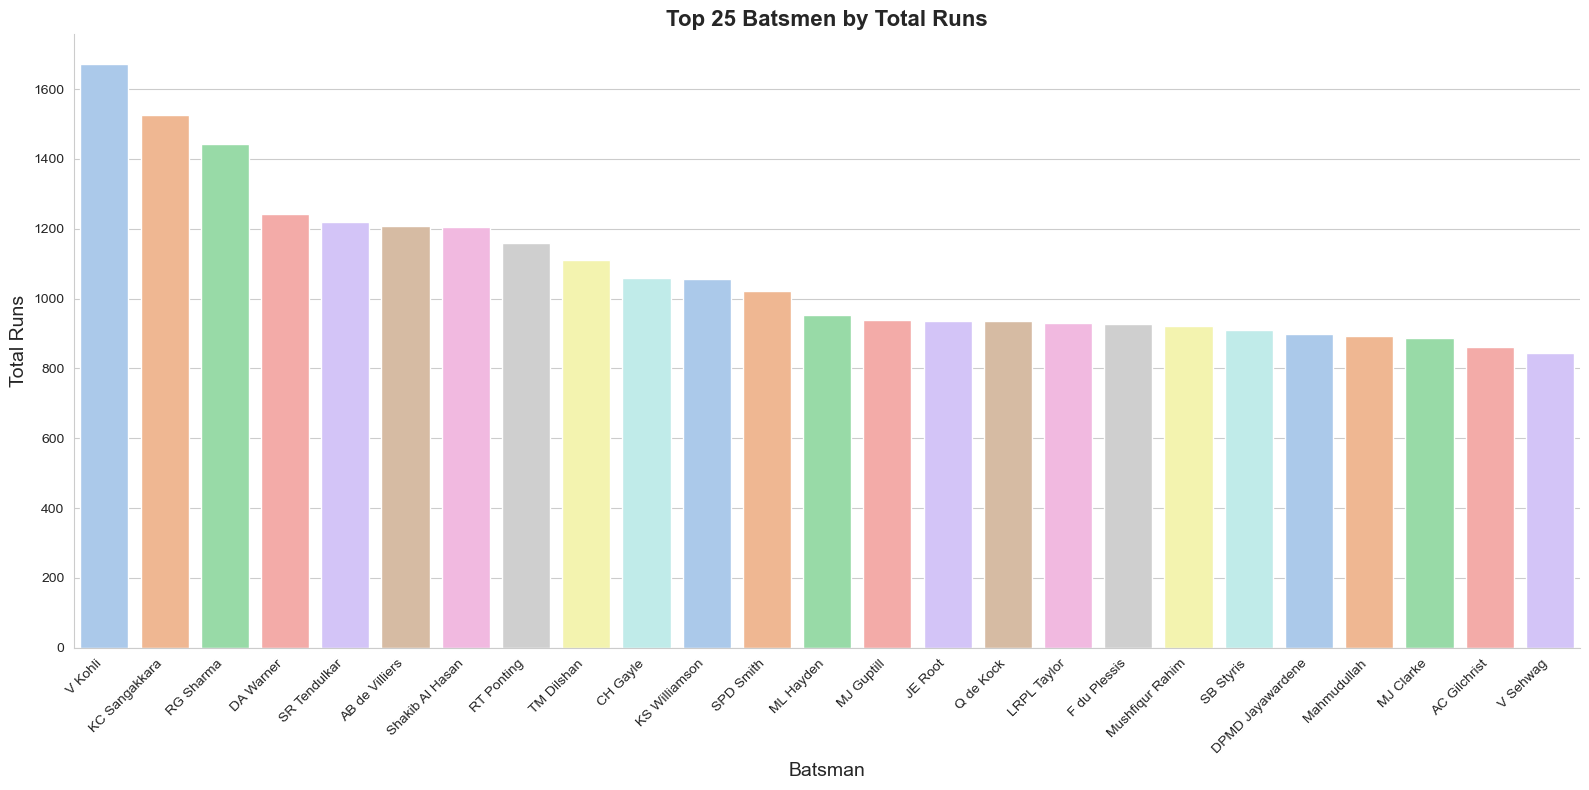

In [67]:
batsman_runs = bat_df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)
top_25_batsmen = batsman_runs.head(25)

sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))
sns.barplot(x=top_25_batsmen.index, y=top_25_batsmen.values, palette="pastel")

plt.xlabel("Batsman", fontsize=14)
plt.ylabel("Total Runs", fontsize=14)
plt.title("Top 25 Batsmen by Total Runs", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

sns.despine()
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

plt.tight_layout()
plt.show()

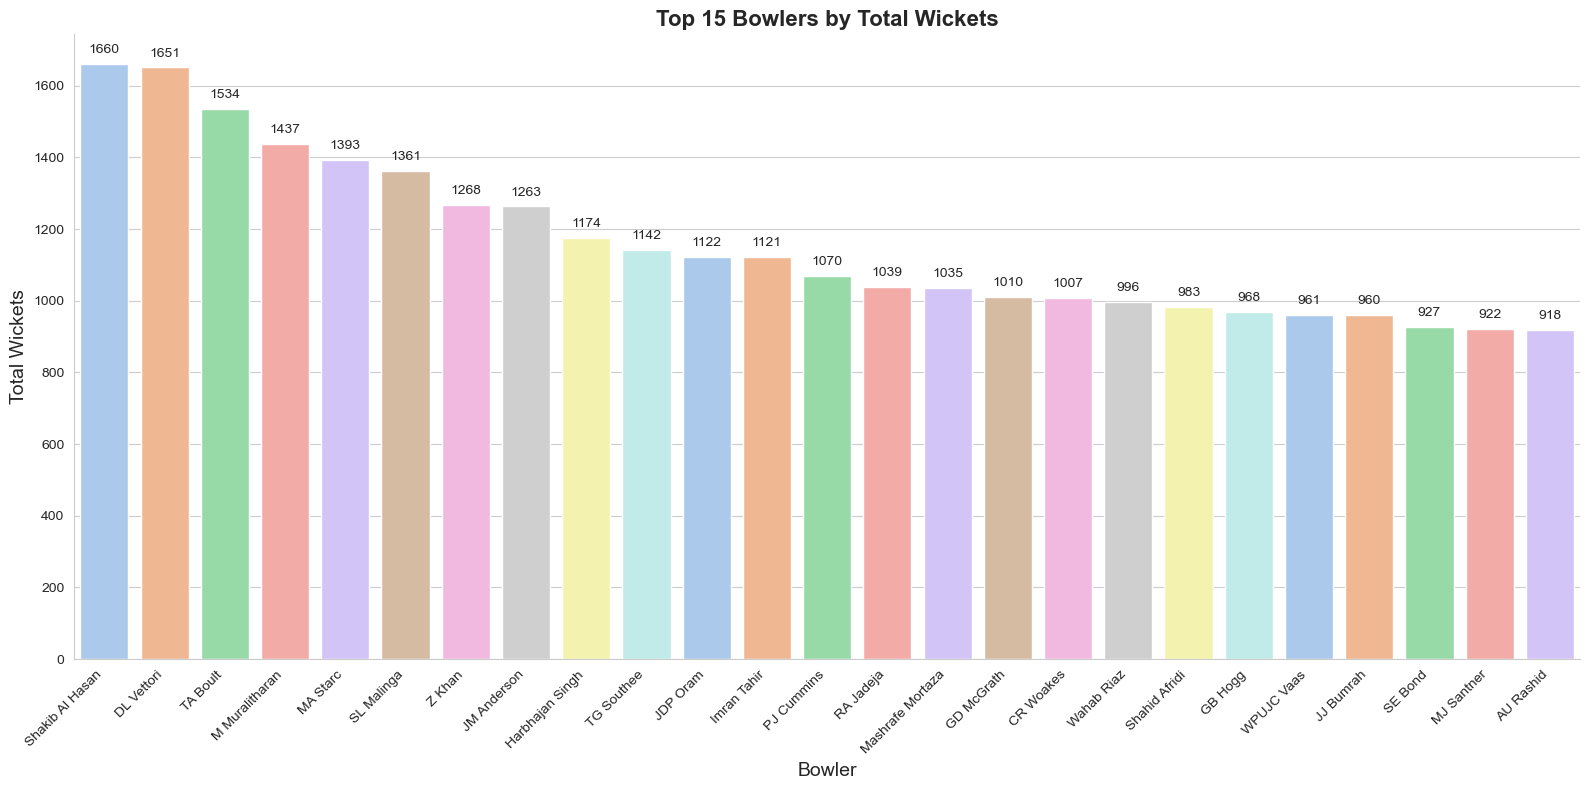

In [68]:
bowler_wickets = bat_df.groupby('bowler')['wicket_no'].count().sort_values(ascending=False)
top_25_bowlers = bowler_wickets.head(25)

sns.set_style("whitegrid")

plt.figure(figsize=(16, 8))  
ax = sns.barplot(x=top_25_bowlers.index, y=top_25_bowlers.values, palette="pastel")

for p in ax.patches:  
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center',  
                xytext=(0, 10), textcoords='offset points')

plt.xlabel("Bowler", fontsize=14)
plt.ylabel("Total Wickets", fontsize=14)
plt.title("Top 15 Bowlers by Total Wickets", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)

sns.despine()
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.tight_layout()
plt.show()

In [69]:
runs_per_over = bat_df.groupby(['batting_team', 'over'])['runs_off_bat'].sum().reset_index()
runs_per_over_pivot = runs_per_over.pivot(index='over', columns='batting_team', values='runs_off_bat')

sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

team1 = input("Enter the first team name: ").lower()
team2 = input("Enter the second team name: ").lower()

if team1 in runs_per_over_pivot.columns and team2 in runs_per_over_pivot.columns:
    plt.plot(runs_per_over_pivot.index, runs_per_over_pivot[team1], label=team1, marker='o')
    plt.plot(runs_per_over_pivot.index, runs_per_over_pivot[team2], label=team2, marker='o')
    plt.xlabel('Over', fontsize=14)
    plt.ylabel('Total Runs', fontsize=14)
    plt.title(f'Runs per Over for {team1} and {team2}', fontsize=16, fontweight='bold')
    plt.legend(title='Team', loc='upper left', frameon=False, fontsize=10)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"One or both teams not found in the dataset.")

Enter the first team name:  Pakistan
Enter the second team name:  India


One or both teams not found in the dataset.


<Figure size 1600x800 with 0 Axes>

In [70]:
striker_stats = bat_df.groupby('striker').agg(
    runs_off_bat=('runs_off_bat', 'sum'),
    balls_faced=('ball', 'sum')
).reset_index()

striker_stats['strike_rate'] = (striker_stats['runs_off_bat'] / striker_stats['balls_faced']) * 100

top_10_strikers = striker_stats.sort_values(by='runs_off_bat', ascending=False).head(10)

top_10_strikers[['striker', 'runs_off_bat', 'strike_rate']]

striker  runs_off_bat  strike_rate
664          V Kohli          1673     3.792705
328    KC Sangakkara          1525     3.763471
523        RG Sharma          1443     7.218501
146        DA Warner          1242     7.114502
587     SR Tendulkar          1219     5.571527
17    AB de Villiers          1207     5.306661
615  Shakib Al Hasan          1204     3.703533
541       RT Ponting          1160     3.701978
642       TM Dilshan          1112     4.493238
111         CH Gayle          1060     8.291154

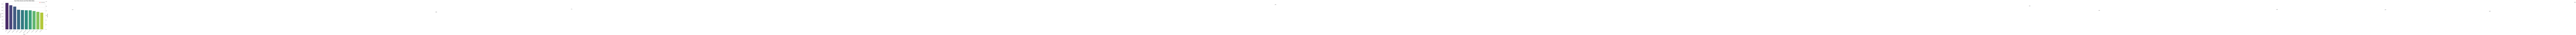

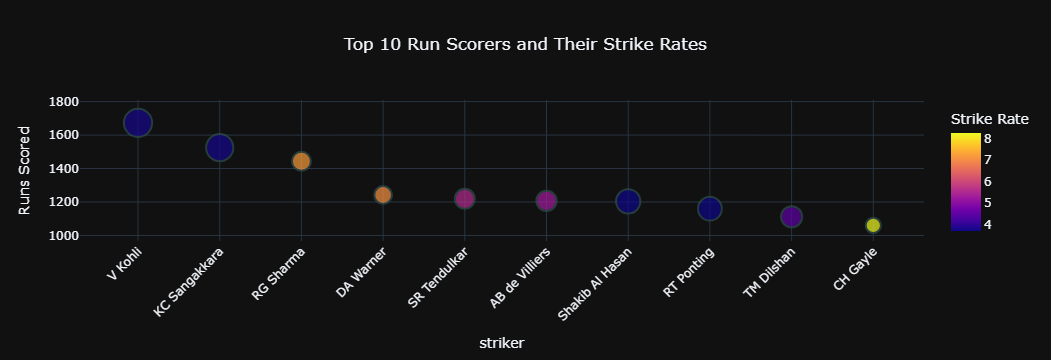

In [74]:
top_10_strikers = striker_stats.sort_values(by='runs_off_bat', ascending=False).head(10)
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=top_10_strikers, x='striker', y='runs_off_bat', ax=ax, palette='viridis')

for i, row in top_10_strikers.iterrows():
    ax.text(i, row['runs_off_bat'] + 20, f"{row['strike_rate']:.2f}", color='black', ha='center', fontsize=12)

ax.set_title('Top 10 Run Scorers and Their Strike Rates', fontsize=16, weight='bold')
ax.set_xlabel('Player', fontsize=12)
ax.set_ylabel('Runs Scored', fontsize=12)
ax.set_xticklabels(top_10_strikers['striker'], rotation=45, ha="right", fontsize=10)
ax2 = ax.twinx()
sns.scatterplot(data=top_10_strikers, x='striker', y='strike_rate', ax=ax2, color='red', s=100, label='Strike Rate', marker='o')
ax2.set_ylabel('Strike Rate', fontsize=12)
ax2.set_ylim(70, 130)
ax2.legend(loc='upper right')
ax2.grid(False)
plt.tight_layout()
plt.show()

fig = px.scatter(top_10_strikers, x='striker', y='runs_off_bat', size='balls_faced', color='strike_rate',
                 hover_name='striker', hover_data={'runs_off_bat': True, 'strike_rate': True, 'balls_faced': True},
                 title="Top 10 Run Scorers and Their Strike Rates", labels={"runs_off_bat": "Runs Scored", "strike_rate": "Strike Rate"})

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(title_x=0.5, xaxis_tickangle=-45, template="plotly_dark", font=dict(size=12))
fig.show()

In [75]:
bat_df['strike_rate'] = (bat_df['runs_off_bat'] / bat_df['ball']) * 100

top_10_bowlers = bat_df.groupby('bowler').agg(
    runs_off_bat=('runs_off_bat', 'sum'),
    balls_faced=('ball', 'sum'),
    strike_rate=('strike_rate', 'mean')
).reset_index()

top_10_bowlers.head(10)

bowler  runs_off_bat  balls_faced  strike_rate
0  A Codrington           125       2847.3     9.439065
1        A Dutt           365       7273.6    31.100135
2    A Flintoff           409      16679.4     3.118981
3      A Kumble           133       5115.7     2.663465
4       A Nehra           396      11715.0     6.559080
5         A Nel           203       7421.7     4.600445
6       A Patel            67        612.6   111.565029
7     A Shahzad            84       2575.8    15.127757
8     A Symonds           208       6731.9     3.382682
9       A Zampa           624      17755.8     3.941185

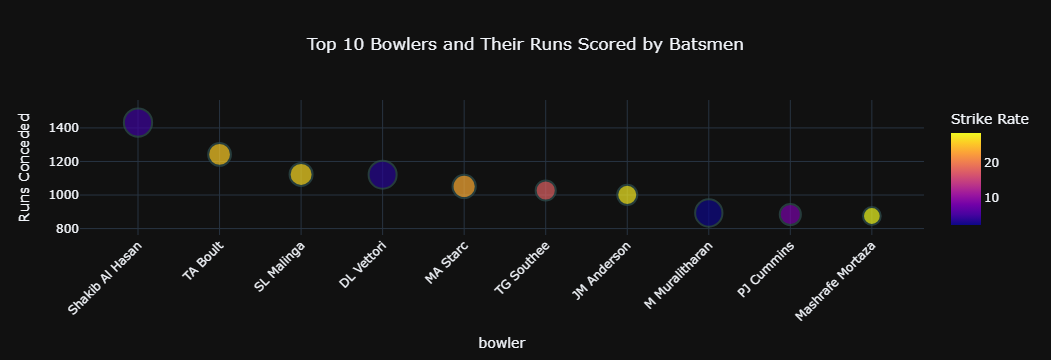

In [76]:
import plotly.express as px

if 'strike_rate' not in bat_df.columns:
    bat_df['strike_rate'] = (bat_df['runs_off_bat'] / bat_df['ball']) * 100

top_10_bowlers = bat_df.groupby('bowler').agg(
    runs_off_bat=('runs_off_bat', 'sum'),
    balls_faced=('ball', 'sum'),
    strike_rate=('strike_rate', 'mean')
).reset_index()

top_10_bowlers = top_10_bowlers.sort_values(by='runs_off_bat', ascending=False).head(10)

# Create the bubble chart
fig = px.scatter(top_10_bowlers, x='bowler', y='runs_off_bat', size='balls_faced', color='strike_rate',
                 hover_name='bowler', hover_data={'runs_off_bat': True, 'strike_rate': True, 'balls_faced': True},
                 title="Top 10 Bowlers and Their Runs Scored by Batsmen", labels={"runs_off_bat": "Runs Conceded", "strike_rate": "Strike Rate"})

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(title_x=0.5, xaxis_tickangle=-45, template="plotly_dark", font=dict(size=12))
fig.show()


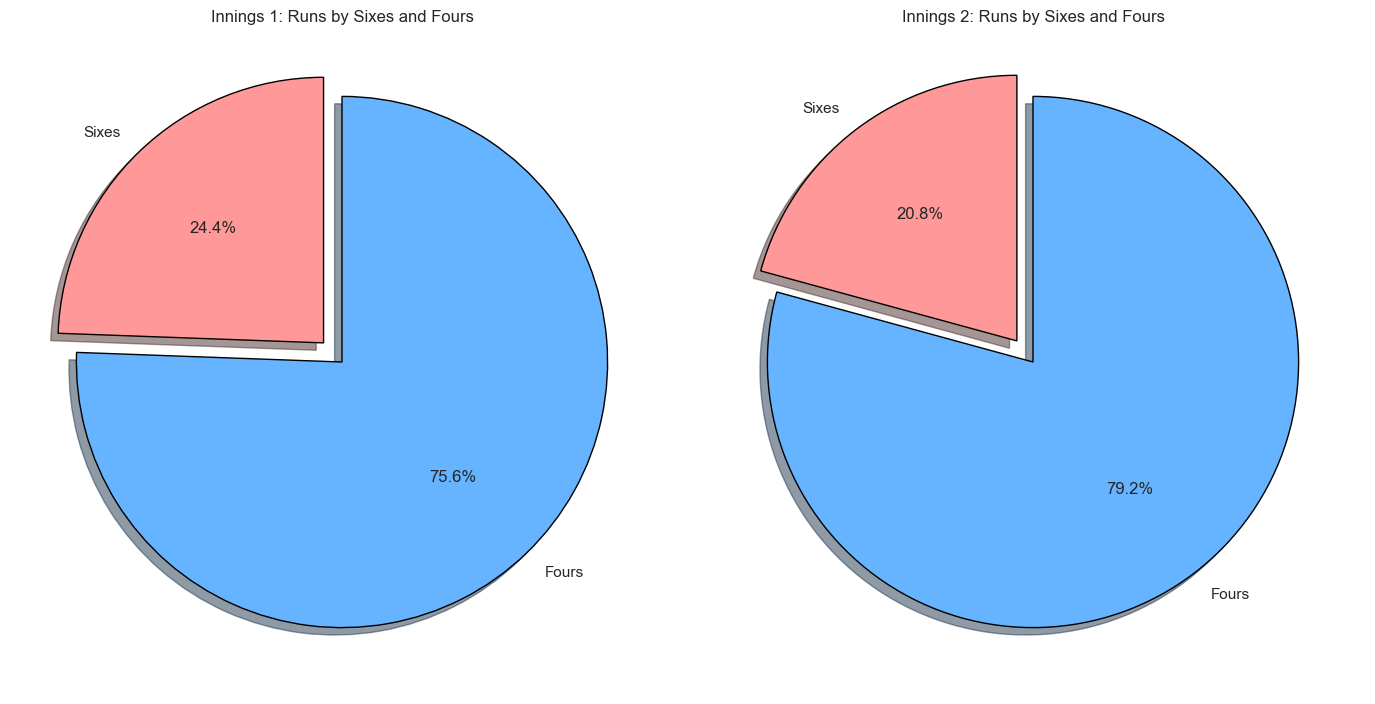

In [77]:
innings_1 = bat_df[bat_df['innings'] == 1]
innings_2 = bat_df[bat_df['innings'] == 2]

innings_1_sixes = innings_1[innings_1['runs_off_bat'] == 6].shape[0] * 6
innings_1_fours = innings_1[innings_1['runs_off_bat'] == 4].shape[0] * 4

innings_2_sixes = innings_2[innings_2['runs_off_bat'] == 6].shape[0] * 6
innings_2_fours = innings_2[innings_2['runs_off_bat'] == 4].shape[0] * 4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie([innings_1_sixes, innings_1_fours], labels=['Sixes', 'Fours'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'],
        startangle=90, explode=(0.1, 0), shadow=True, wedgeprops={'edgecolor': 'black'})
ax1.set_title('Innings 1: Runs by Sixes and Fours')

ax2.pie([innings_2_sixes, innings_2_fours], labels=['Sixes', 'Fours'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'],
        startangle=90, explode=(0.1, 0), shadow=True, wedgeprops={'edgecolor': 'black'})
ax2.set_title('Innings 2: Runs by Sixes and Fours')

plt.tight_layout()
plt.show()

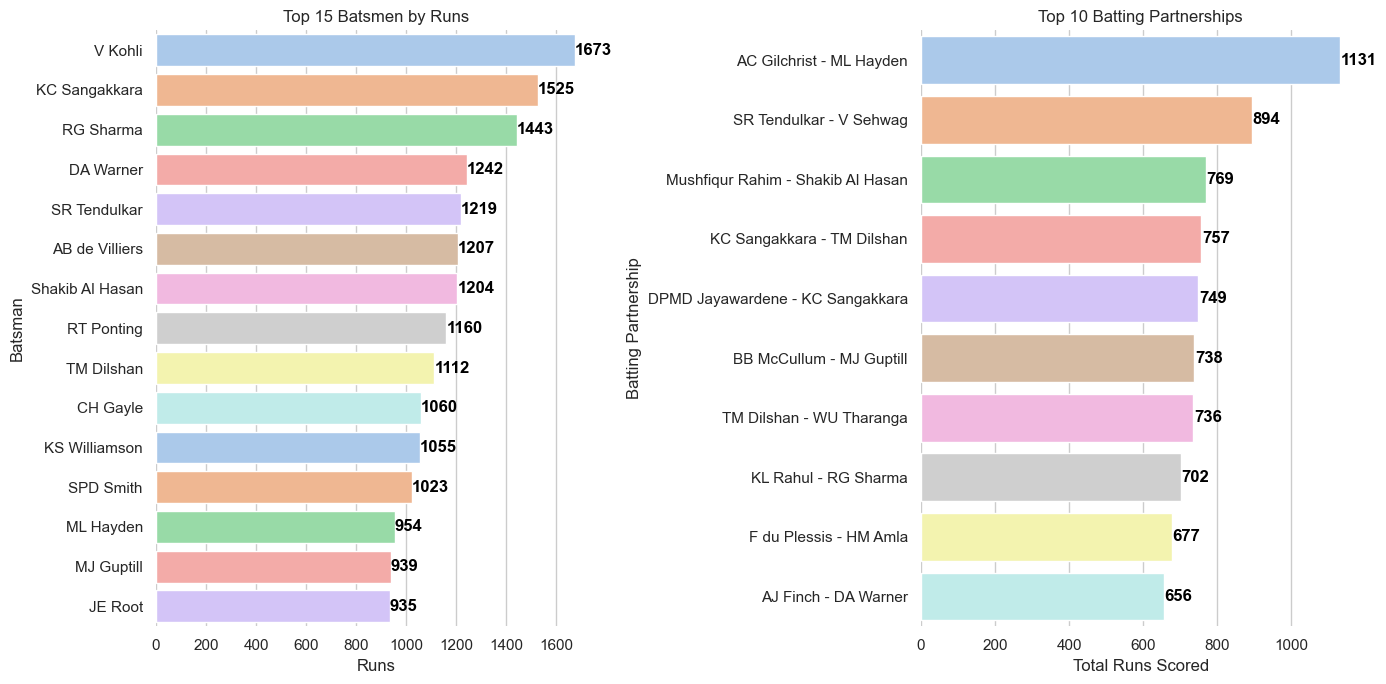

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

batsman_runs = bat_df.groupby('striker')['runs_off_bat'].sum().reset_index()
batsman_runs = batsman_runs.sort_values(by='runs_off_bat', ascending=False).head(15)

pastel_colors = sns.color_palette("pastel")

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
ax = sns.barplot(x='runs_off_bat', y='striker', data=batsman_runs, palette=pastel_colors)
plt.title('Top 15 Batsmen by Runs')
plt.xlabel('Runs')
plt.ylabel('Batsman')
sns.despine(left=True, bottom=True)

for index, value in enumerate(batsman_runs['runs_off_bat']):
    ax.text(value, index, str(value), va='center', fontsize=12, color='black', fontweight='bold', ha='left')

bat_df['batting_pair'] = bat_df.apply(lambda x: ' - '.join(sorted([x['striker'], x['non_striker']])), axis=1)
partnership_runs = bat_df.groupby('batting_pair')['runs_off_bat'].sum().reset_index()
partnership_runs = partnership_runs.sort_values(by='runs_off_bat', ascending=False).head(10)

plt.subplot(1, 2, 2)
ax = sns.barplot(x='runs_off_bat', y='batting_pair', data=partnership_runs, palette=pastel_colors)

for index, value in enumerate(partnership_runs['runs_off_bat']):
    ax.text(value + 2, index, str(value), va='center', fontsize=12, color='black', fontweight='bold')

plt.xlabel("Total Runs Scored")
plt.ylabel("Batting Partnership")
plt.title("Top 10 Batting Partnerships")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

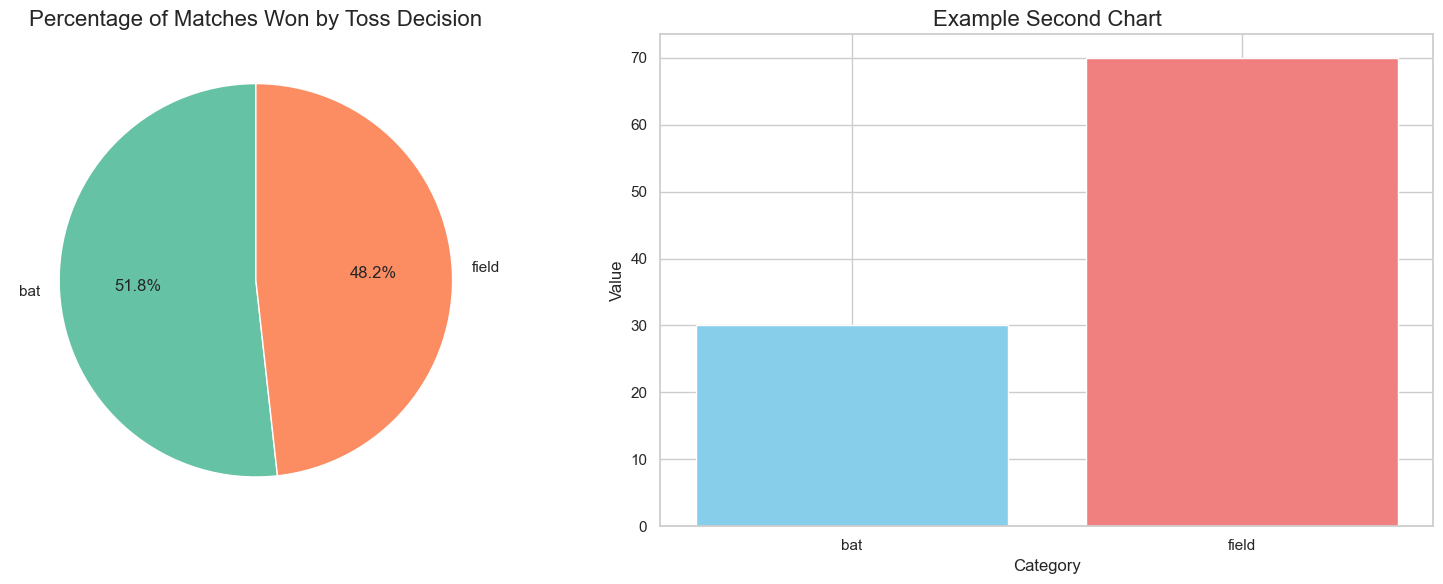

In [79]:
df_clean = match_df.dropna(subset=['winner'])
wins_by_decision = df_clean.groupby('toss_decision').size().reset_index(name='wins')
total_matches = df_clean.shape[0]
wins_by_decision['percentage'] = (wins_by_decision['wins'] / total_matches) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(wins_by_decision['percentage'], labels=wins_by_decision['toss_decision'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
axes[0].set_title('Percentage of Matches Won by Toss Decision', fontsize=16)

example_data = pd.DataFrame({'Category': ['bat', 'field'], 'Value': [30, 70]})
axes[1].bar(example_data['Category'], example_data['Value'], color=['skyblue', 'lightcoral'])
axes[1].set_title('Example Second Chart', fontsize=16)
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()


In [80]:
def is_six(runs):
    return 1 if runs == 6 else 0

def is_four(runs):
    return 1 if runs == 4 else 0

def is_single(runs):
    return 1 if runs == 1 else 0

def is_double(runs):
    return 1 if runs == 2 else 0
    
df_copy = bat_df.copy()
df_copy['is_six'] = df_copy['runs_off_bat'].apply(is_six)
df_copy['is_four'] = df_copy['runs_off_bat'].apply(is_four)
df_copy['is_single'] = df_copy['runs_off_bat'].apply(is_single)
df_copy['is_double'] = df_copy['runs_off_bat'].apply(is_double)
pivot_df = df_copy.groupby('striker').agg(
    total_sixes=('is_six', 'sum'),
    total_fours=('is_four', 'sum'),
    total_singles=('is_single', 'sum'),
    total_doubles=('is_double', 'sum')
).reset_index()
pivot_df = pivot_df.sort_values(by=['total_sixes', 'total_fours'], ascending=False).head(10)
html = f"""
<div style='display: flex; align-items: center; margin-left : 60px;'>
    <div style='flex: 1; padding: 10px;'>
        <h2>Player Run Types</h2>
        {pivot_df.to_html(index=False)}  
    </div>
</div>
"""
from IPython.core.display import display, HTML
display(HTML(html))

In [81]:
import pandas as pd

df_copy = match_df.copy()

def get_winning_percentage(df, team_a, team_b):
    total_matches = len(df[(df['team_A'] == team_a) & (df['team_B'] == team_b)]) + len(df[(df['team_A'] == team_b) & (df['team_B'] == team_a)])
    if total_matches == 0:
        return 0
    team_a_wins = len(df[(df['team_A'] == team_a) & (df['team_B'] == team_b) & (df['winner'] == team_a)]) + len(df[(df['team_A'] == team_b) & (df['team_B'] == team_a) & (df['winner'] == team_a)])
    return (team_a_wins / total_matches) * 100

teams = pd.concat([df_copy['team_A'], df_copy['team_B']]).unique()

win_percentage_df = pd.DataFrame(index=teams, columns=teams)

for team_a in teams:
    for team_b in teams:
        if team_a != team_b:
            win_percentage_df.loc[team_a, team_b] = get_winning_percentage(df_copy, team_a, team_b)
        else:
            win_percentage_df.loc[team_a, team_b] = None

styled_win_percentage_df = win_percentage_df.style.background_gradient(cmap='pastel', axis=None)

styled_win_percentage_df


# Still in Work